In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

from keras.datasets import mnist
from keras.utils import to_categorical

from keras import layers
from keras import models
from keras import initializers

#number of training session
experiments = 30

f1,f2,f3 = [],[],[]
f1_container,f2_container,f3_container = [],[],[]

for experiment in range(experiments):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), kernel_initializer= 'random_uniform', activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer= 'random_uniform',  activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer= 'random_uniform',  activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    train_images = train_images.reshape((60000, 28, 28, 1))
    train_images = train_images.astype('float32') / 255

    test_images = test_images.reshape((10000, 28, 28, 1))
    test_images = test_images.astype('float32') / 255

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    #number of epochs for a single training
    epochs = 10
    
    first_layer,second_layer, third_layer = [],[],[]

    model.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


    for i in range(epochs):


        model.fit(train_images, train_labels, epochs=1, batch_size=64)

        check = 1
        layer_number = 0

        while check <= len(model.layers):
            check += 1

            for layer in model.layers:
                W = layer.get_weights()

                if 'Conv2D' in str(layer):
                    layer_number +=1

                    if (layer_number == 1):
                        first_layer.append(W)
                        continue

                    if (layer_number == 2):
                        second_layer.append(W)
                        continue

                    if (layer_number == 3):
                        third_layer.append(W)
                        continue
    #store the weights at each epoch
    '''with open("experiment_layers_update/experiment_{}_first_layer.csv".format(experiment), "w") as file:
        writer = csv.writer(file)
        writer.writerows(first_layer)

    with open("experiment_layers_update/experiment_{}_second_layer.csv".format(experiment), "w") as file:
        writer = csv.writer(file)
        writer.writerows(second_layer)

    with open("experiment_layers_update/experiment_{}_third_layer.csv".format(experiment), "w") as file:
        writer = csv.writer(file)
        writer.writerows(third_layer)'''
     
     
    # calculate the pairwise distances between the target (first_layer[-1][0]) and the weights at each epoch (first_layer[i][0])
    first_container,second_container,third_container = [], [], []

    for i in range(epochs):
        
        first_container.append(abs(first_layer[-1][0] - first_layer[i][0]).sum())
        second_container.append(abs(second_layer[-1][0] - second_layer[i][0]).sum())
        third_container.append(abs(third_layer[-1][0] - third_layer[i][0]).sum())
    
    #normilize the distance
    maximum = first_container[0]
    first = first_container/maximum
    maximum_second = second_container[0]
    second = second_container/maximum_second
    maximum_third = third_container[0]
    third = third_container/maximum_third
    
    #append the pairwise distances in f1_container, f2_container, f3_container
    f1_container.append(first_container)
    f2_container.append(second_container)
    f3_container.append(third_container)
    
    #append the normalized distanced in f1, f2, f3
    f1.append(first)
    f2.append(second)
    f3.append(third)
    
# store the normilized distances and the pairwise distances       
'''
with open("experiment_layers_update/experiment_first_layer_final.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f1)

with open("experiment_layers_update/experiment_second_layer_final.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f2)

with open("experiment_layers_update/experiment_third_layer_final.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f3)    
    
with open("experiment_layers_update/experiment_first_layer_final_container.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f1_container)

with open("experiment_layers_update/experiment_second_layer_final_container.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f2_container)

with open("experiment_layers_update/experiment_third_layer_final_container.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(f3_container) '''
    
#converte the normilized distances and paiwise distances in tables    
table_1 = pd.DataFrame(f1)
table_2 = pd.DataFrame(f2)
table_3 = pd.DataFrame(f3)
table_1_container = pd.DataFrame(f1_container)
table_2_container = pd.DataFrame(f2_container)
table_3_container = pd.DataFrame(f3_container)

#store and reload the tables
'''
table_1.to_csv("experiment_layers_update/table_layer_1.csv", sep = '\t', encoding = 'utf-8')
table_2.to_csv("experiment_layers_update/table_layer_2.csv", sep = '\t', encoding = 'utf-8')
table_3.to_csv("experiment_layers_update/table_layer_3.csv", sep = '\t', encoding = 'utf-8')
table_1_container.to_csv("experiment_layers_update/table_layer_1_container.csv", sep = '\t', encoding = 'utf-8')
table_2_container = pd.read_csv('experiment_layers_update/table_layer_2_container.csv', sep= '\t', encoding = 'utf-8')
table_3_container = pd.read_csv('experiment_layers_update/table_layer_3_container.csv', sep= '\t', encoding = 'utf-8')

table_1 = pd.read_csv('experiment_layers_update/table_layer_1.csv', sep= '\t', encoding = 'utf-8')
table_2 = pd.read_csv('experiment_layers_update/table_layer_2.csv', sep= '\t', encoding = 'utf-8')
table_3 = pd.read_csv('experiment_layers_update/table_layer_3.csv', sep= '\t', encoding = 'utf-8')
table_1_container = pd.read_csv('experiment_layers_update/table_layer_1_container.csv', sep= '\t', encoding = 'utf-8')
table_2_container = pd.read_csv('experiment_layers_update/table_layer_2_container.csv', sep= '\t', encoding = 'utf-8')
table_3_container = pd.read_csv('experiment_layers_update/table_layer_3_container.csv', sep= '\t', encoding = 'utf-8')
table_2_container.to_csv("experiment_layers_update/table_layer_2_container.csv", sep = '\t', encoding = 'utf-8')
table_3_container.to_csv("experiment_layers_update/table_layer_3_container.csv", sep = '\t', encoding = 'utf-8')

table_1 = table_1.drop(columns=['Unnamed: 0'])
table_2 = table_2.drop(columns=['Unnamed: 0'])
table_3 = table_3.drop(columns=['Unnamed: 0'])
table_1_container = table_1_container.drop(columns=['Unnamed: 0'])
table_2_container = table_2_container.drop(columns=['Unnamed: 0'])
table_3_container = table_3_container.drop(columns=['Unnamed: 0']) '''

# calculate mean and sstandard deciation over all the experiments 
a_1_mean=[]
a_1_std = []
for i in range(epochs):
    a_1_mean.append(table_1[(i)].mean())
    a_1_std.append(table_1[(i)].std())
    
a_2_mean=[]
a_2_std = []
for i in range(epochs):
    a_2_mean.append(table_2[(i)].mean())
    a_2_std.append(table_2[(i)].std())
    
a_3_mean=[]
a_3_std = []
for i in range(epochs):
    a_3_mean.append(table_3[(i)].mean())
    a_3_std.append(table_3[(i)].std())



## Plot mean and std for each layer at every epoch

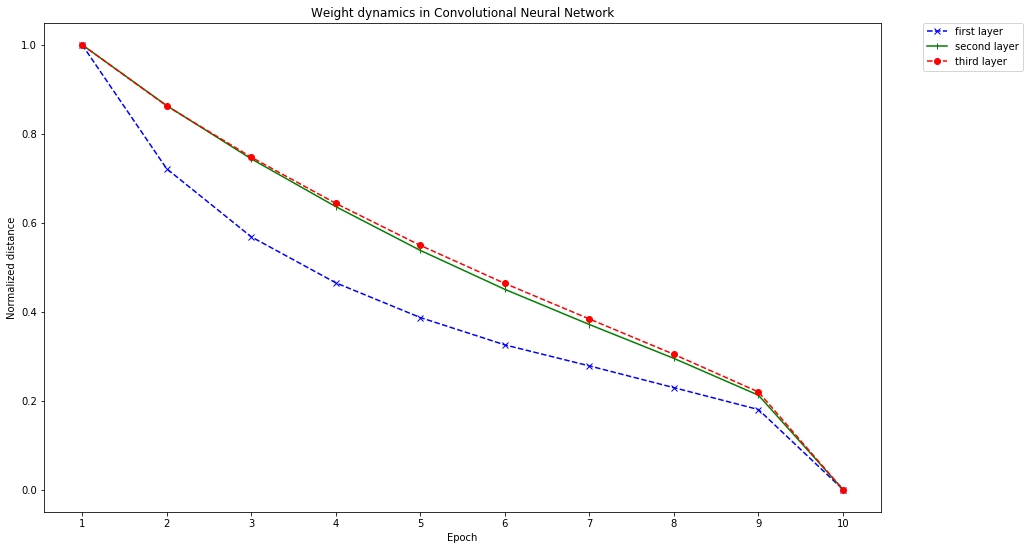

In [7]:
table_1 = pd.read_csv('experiment_layers_update/table_layer_1.csv', sep= '\t', encoding = 'utf-8')
table_2 = pd.read_csv('experiment_layers_update/table_layer_2.csv', sep= '\t', encoding = 'utf-8')
table_3 = pd.read_csv('experiment_layers_update/table_layer_3.csv', sep= '\t', encoding = 'utf-8')

a_1_mean=[]
a_1_std = []
for i in range(10):
    a_1_mean.append(table_1[str(i)].mean())
    a_1_std.append(table_1[str(i)].std())
    
a_2_mean=[]
a_2_std = []
for i in range(10):
    a_2_mean.append(table_2[str(i)].mean())
    a_2_std.append(table_2[str(i)].std())
    
a_3_mean=[]
a_3_std = []
for i in range(10):
    a_3_mean.append(table_3[str(i)].mean())
    a_3_std.append(table_3[str(i)].std())
    
f = plt.figure(figsize=(15,9))
f = plt.errorbar(range(1,11), a_1_mean, color='b', fmt='--x', ecolor='b', capthick=1, label = 'first layer')
f = plt.errorbar(range(1,11), a_2_mean, color='g', fmt='-|', ecolor='g', capthick=1, label = 'second layer')
f = plt.errorbar(range(1,11), a_3_mean, color='r', fmt='--o', ecolor='r', capthick=1, label = 'third layer')
f = plt.xticks(range(1,11))
f = plt.xlabel('Epoch')
f = plt.ylabel('Normalized distance')
f = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f = plt.title('Weight dynamics in Convolutional Neural Network')

## Zoom in layer 2 and layer 3

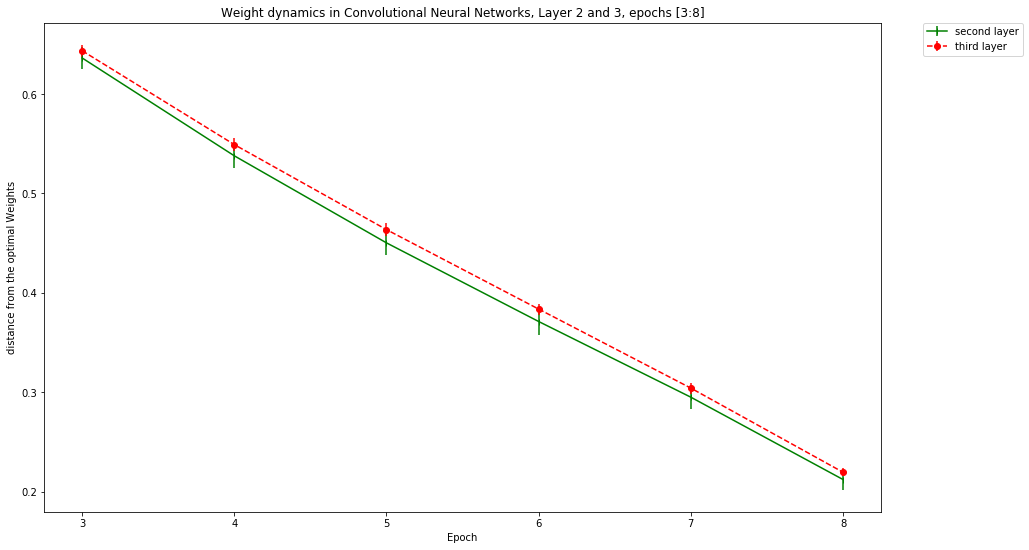

In [4]:
f = plt.figure(figsize=(15,9))
#f = plt.errorbar(range(1,11), a_1_mean, a_1_std, color='b', fmt='--o', ecolor='b', capthick=15, label = 'first layer')
f = plt.errorbar(range(3,9), a_2_mean[3:9], a_2_std[3:9], color='g', fmt='-|', ecolor='g', capthick=2, label = 'second layer')
f = plt.errorbar(range(3,9), a_3_mean[3:9], a_3_std[3:9], color='r', fmt='--o', ecolor='r', capthick=2, label = 'third layer')
f = plt.xticks(range(3,9))
f = plt.xlabel('Epoch')
f = plt.ylabel('distance from the optimal Weights')
f = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f = plt.title('Weight dynamics in Convolutional Neural Networks, Layer 2 and 3, epochs [3:8]')

## Calculating slope between epochs

In [5]:
slope_1 =[abs(round((a_1_mean[i] - a_1_mean[i-1]), 3)) for i in range(1,len(a_1_mean))]
slope_2 =[abs(round((a_2_mean[i] - a_2_mean[i-1]), 3)) for i in range(1,len(a_2_mean))]
slope_3 =[abs(round((a_3_mean[i] - a_3_mean[i-1]), 3)) for i in range(1,len(a_3_mean))]

slope_between_epoch = []
for i in range(1,10):
    slope_between_epoch.append('{} : {}'.format(i,i+1))

slope_table = pd.DataFrame()
slope_table['layer 1'] = slope_1
slope_table['layer 2'] = slope_2
slope_table['layer 3'] = slope_3
slope_table['slope between epochs'] = slope_between_epoch
slope_table = slope_table.set_index('slope between epochs')
table_to_print = slope_table.T
table_to_print

slope between epochs,1 : 2,2 : 3,3 : 4,4 : 5,5 : 6,6 : 7,7 : 8,8 : 9,9 : 10
layer 1,0.279,0.153,0.103,0.078,0.061,0.047,0.049,0.049,0.180
layer 2,0.137,0.120,0.107,0.098,0.088,0.079,0.076,0.083,0.212
layer 3,0.137,0.115,0.104,0.094,0.086,0.080,0.080,0.085,0.219
